In [23]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import git
import sys
import os
import time
import numpy as np
import pandas as pd

from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.visualization.visualize_sequences import viz_sequence
from argoverse.map_representation.map_api import ArgoverseMap

repo = git.Repo('.', search_parent_directories=True)
BASE_DIR = repo.working_tree_dir
sys.path.append(BASE_DIR)

import model.datasets.argoverse.dataset as dataset
import model.datasets.argoverse.dataset_utils as dataset_utils 
import model.datasets.argoverse.map_functions as map_functions

# Set root_dir to the correct path to your dataset folder

split_name = "train"
root_dir = os.path.join(BASE_DIR,f'data/datasets/argoverse/motion-forecasting/{split_name}/data/')

avm = ArgoverseMap()
afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 205942


In [8]:
files, num_files = dataset_utils.load_list_from_folder(root_dir)

file_id_list = []
root_file_name = None
for file_name in files:
    if not root_file_name:
        root_file_name = os.path.dirname(os.path.abspath(file_name))
    file_id = int(os.path.normpath(file_name).split('/')[-1].split('.')[0])
    file_id_list.append(file_id)
file_id_list.sort()
print("Num files: ", num_files)

Num files:  205942


In [ ]:
file_id_list[13233]

In [28]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
seq_id = 13606
seq_path = f"{BASE_DIR}/data/datasets/argoverse/motion-forecasting/{split_name}/data/{seq_id}.csv"
df = pd.read_csv(seq_path, dtype={"TIMESTAMP": str})

obs_len = 20
pred_len = 30

RAW_DATA_FORMAT = {
    "TIMESTAMP": 0,
    "TRACK_ID": 1,
    "OBJECT_TYPE": 2,
    "X": 3,
    "Y": 4,
    "CITY_NAME": 5,
}

# Get social and map features for the agent

agent_track = df[df["OBJECT_TYPE"] == "AGENT"].values

# Map features extraction

start = time.time()
map_features_utils_instance = map_functions.MapFeaturesUtils()
map_features, map_feature_helpers = map_features_utils_instance.compute_map_features(
        agent_track,
        seq_id,
        split_name,
        obs_len,
        obs_len + pred_len,
        RAW_DATA_FORMAT,
        "test", 
        avm       
    )

end = time.time()
print("Time consumed: ", end-start)

dfs_threshold_front, dfs_threshold_back:  139.5 84.0
Time consumed:  0.39626598358154297


In [8]:
file_id_list[13233]

13606

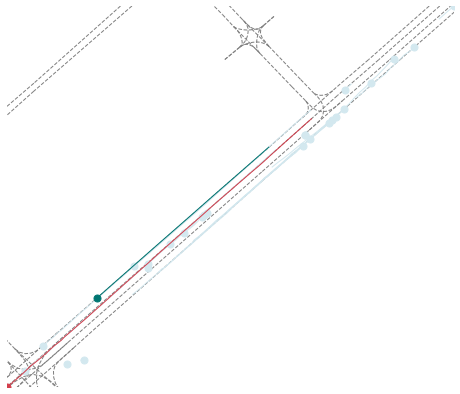

Viz seq:  6.970298528671265


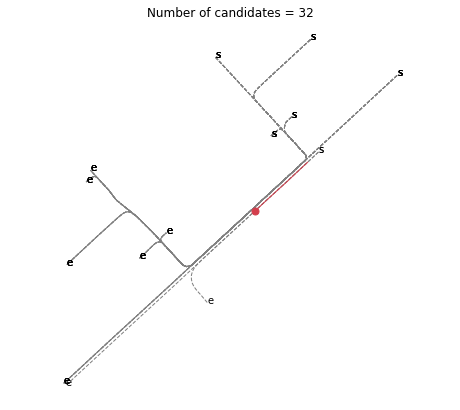

Candidate centerlines:  0.3929290771484375


/home/denso/anaconda3/envs/carlos_vsr_mapfe4mp/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


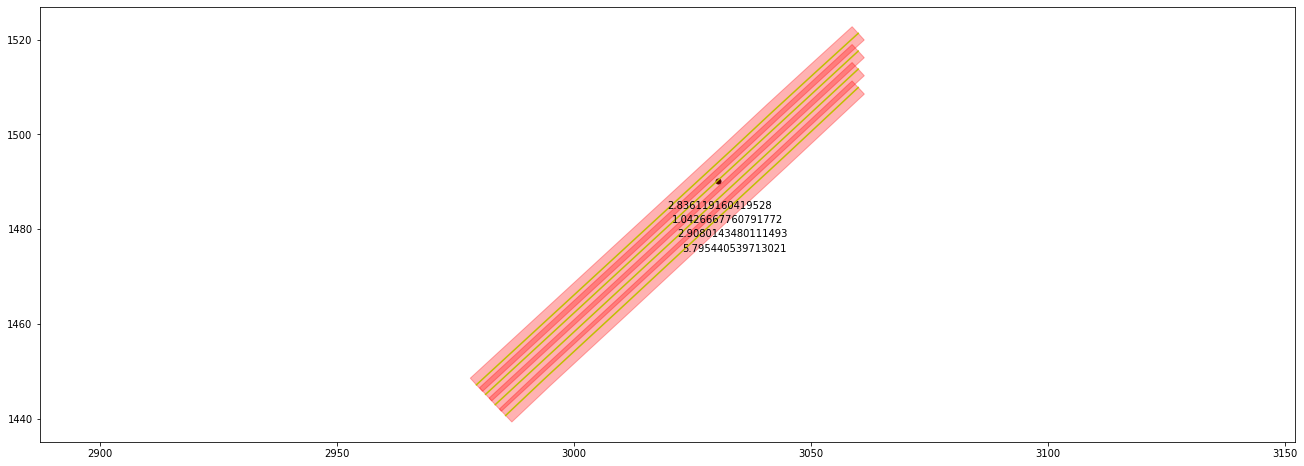

Nearest centerline:  0.1214148998260498


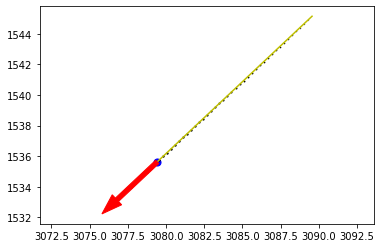

Get lane direction:  0.4225759506225586


In [25]:
seq_path = f"{root_dir}/13606.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize nearest centerline

start = time.time()
nearest_centerline = avm.get_nearest_centerline(np.array(origin_pos), city_name, visualize=viz)
end = time.time()
print("Nearest centerline: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

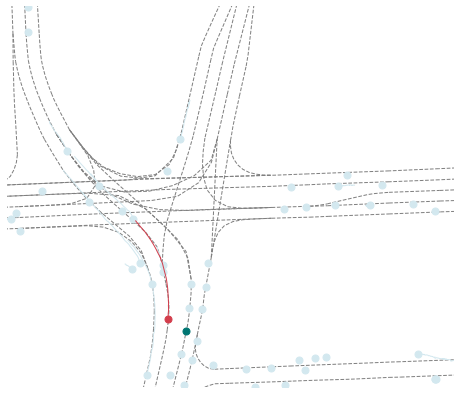

Viz seq:  7.358400821685791


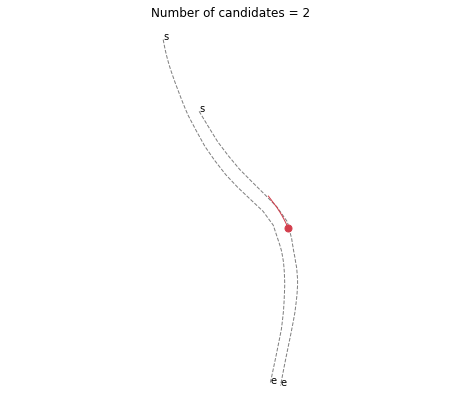

Candidate centerlines:  0.05509161949157715


/home/denso/anaconda3/envs/carlos_vsr_mapfe4mp/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


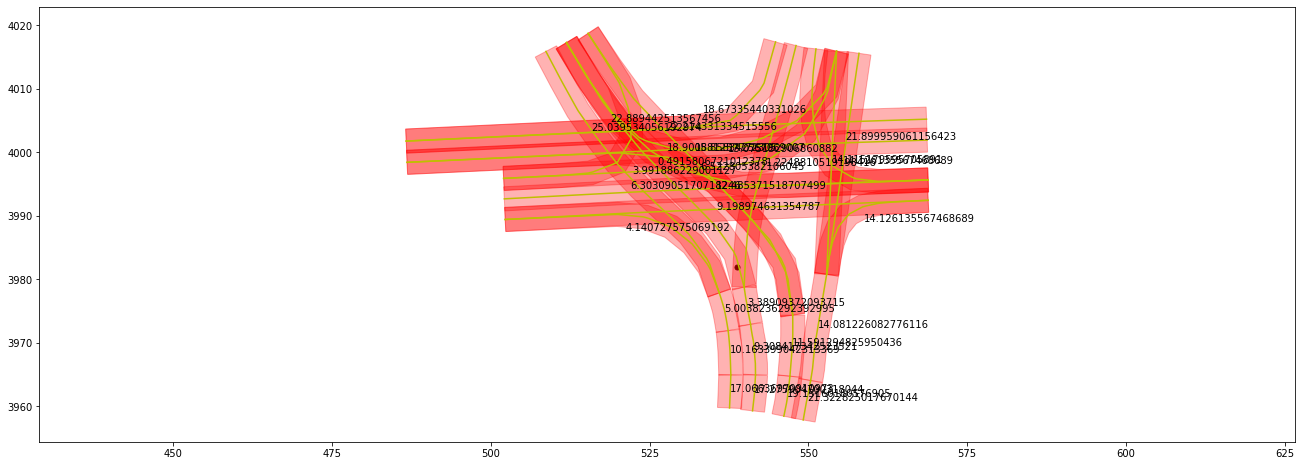

Nearest centerline:  0.23919367790222168


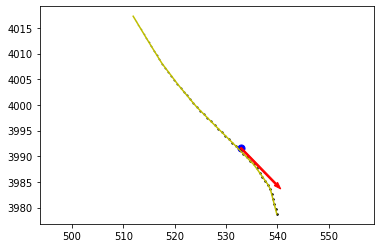

Get lane direction:  0.4093010425567627


In [6]:
seq_path = f"{root_dir}/4.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize nearest centerline

start = time.time()
nearest_centerline = avm.get_nearest_centerline(np.array(origin_pos), city_name, visualize=viz)
end = time.time()
print("Nearest centerline: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

In [9]:
# candidate_centerlines[0].shape
len(candidate_centerlines)

# agent_obs_traj
np.array(origin_pos)

array([ 205.83381422, 1532.52969298])

In [5]:
city_name

'PIT'

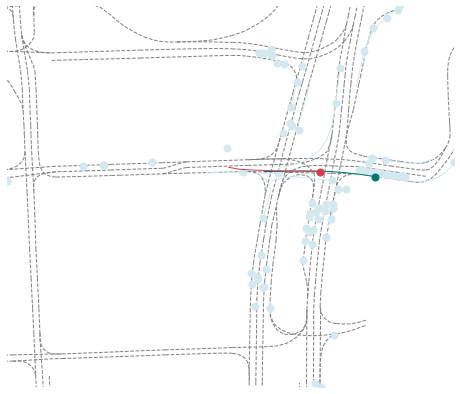

Viz seq:  7.969861745834351


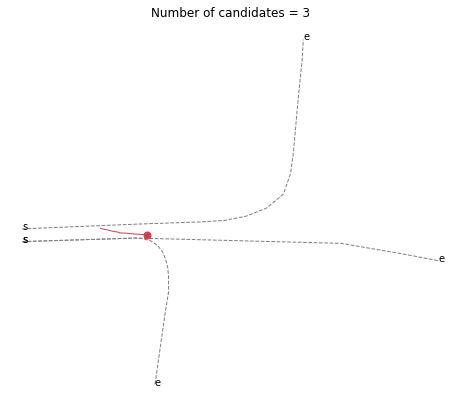

Candidate centerlines:  0.054201602935791016


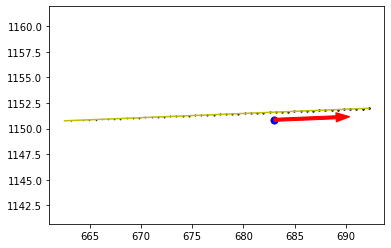

Get lane direction:  0.42394495010375977


In [5]:
seq_path = f"{root_dir}/18359.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
# candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

In [7]:
candidate_centerlines[0].shape

(50, 2)

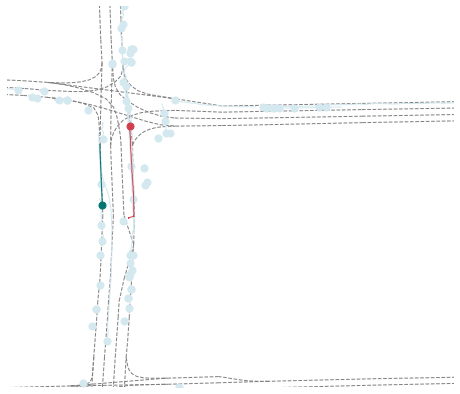

Viz seq:  8.7499361038208


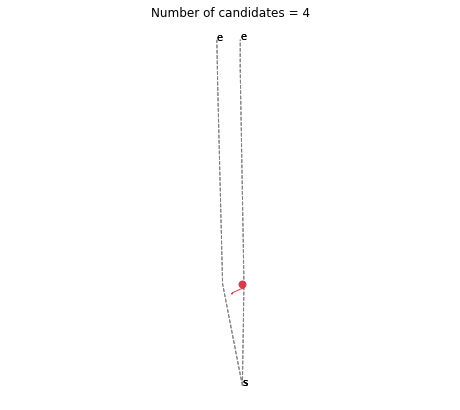

Candidate centerlines:  0.061635494232177734


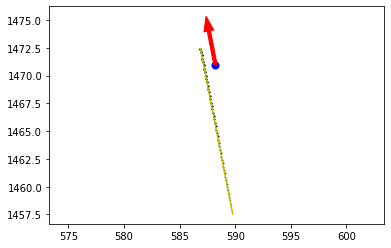

Get lane direction:  0.4422447681427002


In [3]:
seq_path = f"{root_dir}/422.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)

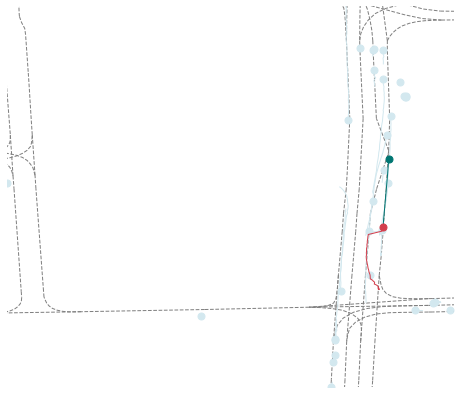

Viz seq:  9.176570653915405


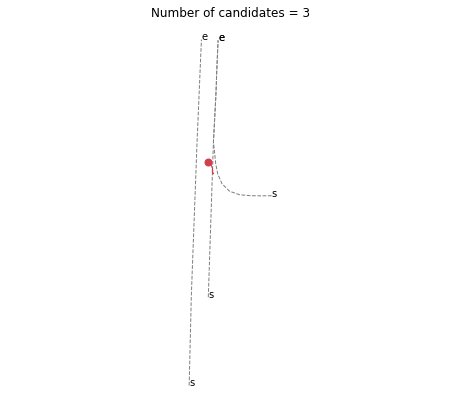

Candidate centerlines:  0.07828092575073242


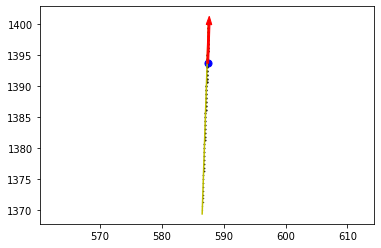

Get lane direction:  0.5057849884033203


In [4]:

seq_path = f"{root_dir}/7016.csv"
viz = True

# Visualize sequence

start = time.time()
viz_sequence(afl.get(seq_path).seq_df, show=viz)
end = time.time()
print("Viz seq: ", end-start)

obs_len = 20
obs_origin = 20

data = dataset_utils.read_file(seq_path) 
origin_pos, city_name = dataset_utils.get_origin_and_city(data,obs_origin)

# Visualize candidate centerlines

agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
start = time.time()
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, city_name, viz=viz)
end = time.time()
print("Candidate centerlines: ", end-start)

# Visualize lane direction in the last observation frame

agent_traj = afl.get(seq_path).agent_traj
start = time.time()
lane_direction = avm.get_lane_direction(agent_traj[0], city_name, visualize=viz)
end = time.time()
print("Get lane direction: ", end-start)